- Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pytides2.tide import Tide
import pytides2.constituent  as cons
import pytides2.astro as astro
from datetime import datetime, timedelta
from matplotlib import font_manager as fm
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import random


In [2]:
path_font=r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\Fonts\Quicksand"

prop1 = fm.FontProperties(fname=path_font+'\Quicksand-Medium.ttf')
prop2 = fm.FontProperties(fname=path_font+'\Quicksand-SemiBold.ttf')
prop1.set_size(12)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Lectura de datos de marea

<AxesSubplot:>

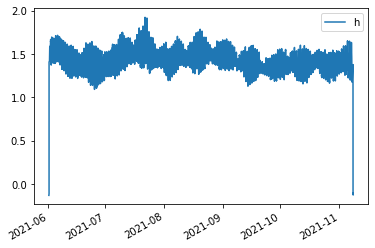

In [5]:
path =(r"G:\My drive\DATOS_SAI_TODOS\SAI_MAREA_VIENTOS_2021_NX\Aq01_6 meses_ClubNautico\Aq01_ClubNautico.csv")
data = pd.read_csv (path,sep=',',encoding = "ISO-8859-1",header=21) #header = Ocultar encabezado
P = data[' bar    '].values                 # Obtener los valores de presión [bares] 
time2 = data[' Timecode'].values             # Obtener los tiempos
fechas_str = (i for i in time2)              # Convertir las fechas en un str
time_data = np.array([datetime.strptime(i,'%m/%d/%Y %H:%M') for i in fechas_str]) # Convertir fechas en arreglo de numpy con datetime 
h = (P-1.01325)*(100000/(9.8*1027))             # Convertir presión a mca
df = pd.DataFrame(data=h,index= time_data,columns=['h']) 
df.plot()

## Metadatos de medicióin

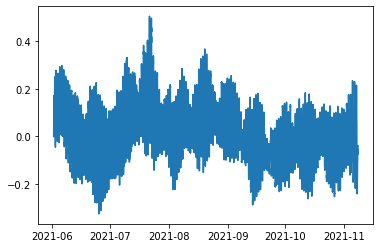

In [6]:
ini_date = datetime(2021,6,1,15,40,0)                       # Entrar la fecha de inicio de toma de datos 
end_date = datetime(2021,11,8,8,50,0)                         # Entrar la fecha final de toma de datos
df = df[ini_date:end_date]
marea = df.h.values -df.h.mean()
t = time_data[np.where(time_data == ini_date)[0][0]:np.where(time_data == end_date)[0][0]+1]
plt.plot(t,marea)

## Descomposición de marea

In [7]:
my_tide = Tide.decompose(marea, t)

## Constituyentes

In [8]:
# constituent = [c.name for c in my_tide.model['constituent']]
# df_constituent = pd.DataFrame(my_tide.model, index = constituent).drop('constituent',axis=1)
# df_constituent.reset_index(inplace=True)
# const_tidal= df_constituent.sort_values('amplitude', ascending = False)

In [10]:
constituent = [c.name for c in my_tide.model['constituent']]
df_constituent = pd.DataFrame(my_tide.model, index = constituent).drop('constituent',axis=1)
df_constituent.reset_index(inplace=True)
df_const_tidal= df_constituent.sort_values('amplitude', ascending = False).rename(columns={'index':'ID'})
df_const_tidal

,ID,amplitude,phase
4,K1,9.479050e-02,164.092098
1,M2,7.496061e-02,16.149900
6,O1,5.657063e-02,169.330397
28,P1,3.075278e-02,160.238137
3,N2,2.516725e-02,340.403458
22,Mf,1.892184e-02,332.360946
2,S2,1.738878e-02,247.495790
24,Q1,8.352470e-03,168.803231
19,J1,6.196569e-03,144.510173
11,nu2,6.032717e-03,343.905531


In [12]:
# Guardar archivo de marea
path = r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
f =open(path+'\Astro_tide.bca','w')
for i in range (len(df_const_tidal.ID)):
    a = f'{df_const_tidal.iloc[i].ID:<17}'
    b = f'{df_const_tidal.iloc[i].amplitude:>8}'
    c = f'{df_const_tidal.iloc[i].phase:>6}'
    print(a+' '+b+' '+c)
    f.write(a+' '+b+' '+c+'\n')
f.close()

K1                0.09479050204241132 164.09209844022962
M2                0.07496060957268848 16.149899856370553
O1                0.056570627103824045 169.33039686690154
P1                0.030752783775221414 160.23813721293027
N2                0.025167253199954 340.4034582811066
Mf                0.018921839872398417 332.36094637975845
S2                0.0173887757923253 247.49578988054685
Q1                0.008352469684222047 168.80323069439714
J1                0.00619656881198057 144.51017330046096
nu2               0.006032717491086204 343.9055310841919
S1                0.005847142107030363 336.7570275744647
MSF               0.005786921178318707 294.3447300649558
L2                0.00529221989847058 5.849829837357342
2N2               0.004990298663391816 299.41267364756106
M1                0.004224496583598464 169.3573144266027
OO1               0.00410493534351692 152.3330574485153
R2                0.00367613202493268 354.34193830279116
K2                0.003442437335

In [10]:
# c1 = cons.noaa
# constituents = [c for c in c1 if not c == cons._Z0]
# constituents = [
#             c for c in constituents if 360.0 * 2 < hours[-1] * c.speed(astro.astro(ini_date))
#         ]
# speed, u, f, V0 = Tide._prepare(constituents,ini_date, t, radians=True)

# rho1 = const_tidal.amplitude.values[0]/1000*np.cos(const_tidal.w.values[0]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[0]))
# Q1 = const_tidal.amplitude.values[1]/1000*np.cos(const_tidal.w.values[1]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[1]))
# MU2 = const_tidal.amplitude.values[2]/1000*np.cos(const_tidal.w.values[2]*np.arange(1,len(t)+1,1)+math.radians(const_tidal.phase.values[2]))

# hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
# xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

# fig, axs = plt.subplots(1,1,figsize=(15,10))
# ax = axs[0]
# ax.plot(t, rho1, label = 'u_1', ms=5, color = 'k')
# ax.plot(t, Q1, label = '$\zeta_1$', ms=5, color = 'r')
# ax.plot(t, MU2, label = '$\zeta_1$', ms=5, color = 'blue')

# ax.set_xticks(xticks_time)
# date_format = mdates.DateFormatter('%y-%m-%d %H')
# ax.xaxis.set_major_formatter(date_format)
# ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
# ax.set_ylabel ('Velocidad $U$ [m/s]',size=16,fontproperties=prop1)
# ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
# for label in ax.get_xticklabels():
#     label.set_fontproperties(prop1)
#     label.set_color('gray')
#     label.set_size(12)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
# ax.set_title('componente1 '+str(const_tidal.index.values[0]),size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
# plt.xticks(rotation=30)
# ax.grid(True)

## Tipo de marea
- Factor forma y rango de marea

In [11]:
print(my_tide.classify())
print('Factor de forma {}'.format(my_tide.form_number()))

mixed (diurnal)
Factor de forma [1.63900527]


## Marea astronómica

In [12]:
astro_tide = my_tide.at(t)
meteo_tide = marea - astro_tide

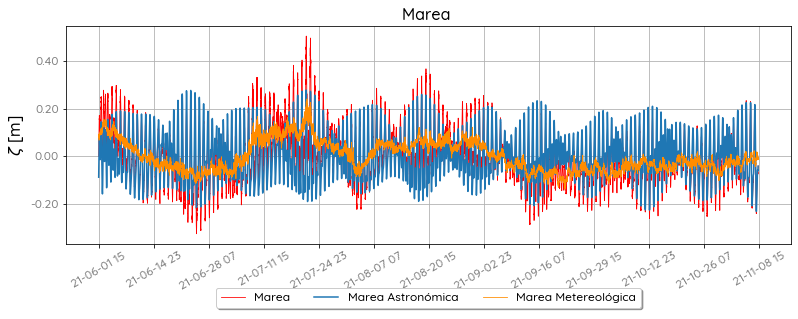

In [13]:
hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(t, marea, ms=5, label = 'Marea', color = 'r', lw = 0.8)
ax.plot(t, astro_tide, label = 'Marea Astronómica')
ax.plot(t,meteo_tide, color = 'darkorange', lw = 0.8, ms=5, label = 'Marea Metereológica')
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\zeta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Marea ',size = 16,fontproperties=prop1)   # Subtítulo de la figura
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

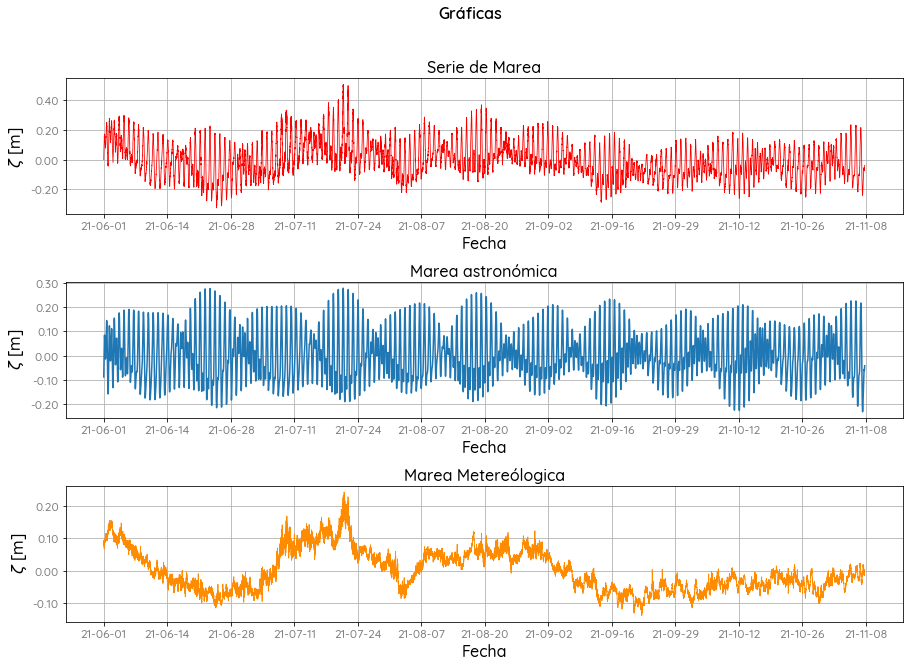

In [14]:
hourticks = ((t[-1]-t[0]).days*24 +(t[-1]-t[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

fig, axs = plt.subplots(3,1,figsize=(15,10))
ax = axs[0]
ax.plot(t, marea, color = 'r', lw = 0.8, ms=5)
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\zeta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Serie de Marea',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

ax1 = axs[1]

ax1.plot(t,astro_tide, ms=5)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel (' $\zeta$ [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax1.grid(True)


ax2 = axs[2]

ax2.plot(t,meteo_tide, color = 'darkorange', lw = 0.8, ms=5)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' $\zeta$ [m]',size=16,fontproperties=prop1)
ax2.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_title('Marea Metereólogica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)
plt.xticks(rotation=0)
ax1.grid(True)
plt.subplots_adjust(hspace=0.5)
#      left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.2, 
                    
# ax.set_title('Velocidad superficial',size=15)
# plt.savefig('E:/Escritorio/INFORME 1ER AÑO UNAL/Anexo_B1/velocidad_2D.png',dpi=800,bbox_inches='tight',pad_inches=0)

# Lectura de estación metereológica

In [15]:
paht = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\DATOS_CAMPO\DATOS_SAI_4_15_nov_2021\METEO_CALIPSO"
data = pd.read_csv(paht+'\Descargados_6Nov2021_430pm.txt', delimiter = "\t", header = 1) # Modeficar ruta

In [17]:
Date = data.Date.values
Time = data.Time.values
time = [Date[i][0:6]+'2021'+' '+ Time[i]+'m' for i in range (0,len(Date))]
fechas_str = (i for i in time)
time_meteo = np.array([datetime.strptime(i, '%m/%d/%Y %I:%M %p') for i in fechas_str])
data['time']=time_meteo
data = data.set_index('time')
data.drop(['Date','Time'],axis=1)
data.tail(10)

,Date,Time,Out,Temp,Temp.1,Hum,Pt.,Speed,Dir,Run,...,Hum.1,Dew,Heat,EMC,Density,ET,Samp,Tx,Recept,Int.
time,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:30:00,11/06/21,11:30 a,28.9,29.1,28.8,---,---,6.7,E,12.07,...,74,26.1,39.2,13.78,1.1182,0.0,480,8,82.6,30
2021-11-06 12:00:00,11/06/21,12:00 p,28.0,28.9,27.4,---,---,8.9,E,16.09,...,75,26.0,38.3,14.14,1.1197,0.0,492,8,84.7,30
2021-11-06 12:30:00,11/06/21,12:30 p,28.7,28.8,28.1,---,---,6.7,E,12.07,...,74,26.5,40.5,13.77,1.1157,0.0,503,8,86.6,30
2021-11-06 13:00:00,11/06/21,1:00 p,28.8,29.1,28.6,---,---,6.3,E,11.27,...,73,26.6,41.4,13.46,1.1141,0.0,504,8,86.7,30
2021-11-06 13:30:00,11/06/21,1:30 p,28.9,28.9,28.7,---,---,6.3,E,11.27,...,72,26.4,41.4,13.15,1.1134,0.0,500,8,86.1,30
2021-11-06 14:00:00,11/06/21,2:00 p,29.6,29.6,28.9,---,---,4.0,E,7.24,...,70,26.1,41.2,12.55,1.1134,0.0,501,8,86.2,30
2021-11-06 14:30:00,11/06/21,2:30 p,29.5,29.6,29.1,---,---,4.5,E,8.05,...,69,26.1,41.6,12.34,1.1123,0.0,496,8,85.4,30
2021-11-06 15:00:00,11/06/21,3:00 p,29.2,29.5,29.1,---,---,4.5,E,8.05,...,69,26.2,41.9,12.34,1.1115,0.0,494,8,85.0,30
2021-11-06 15:30:00,11/06/21,3:30 p,29.2,29.3,29.1,---,---,3.6,E,6.44,...,69,26.2,41.9,12.34,1.1114,0.0,455,8,78.3,30


In [21]:
df_meteo = data
end_date = datetime.fromtimestamp(df_meteo.index.values[-1].astype('O')/1e9)+timedelta(hours=5)
ini_date = datetime.fromtimestamp(df_meteo.index.values[0].astype('O')/1e9)+timedelta(hours=5)
Vwind = df_meteo['Speed'].values
Patm = df_meteo['Bar  '].values
Dir = [str(i) for i in df_meteo['Dir']]# Dir compass
t2 = time_meteo[np.where(time_meteo == ini_date)[0][0]:np.where(time_meteo == end_date)[0][0]+1]
t2

array([datetime.datetime(2021, 9, 14, 8, 30),
       datetime.datetime(2021, 9, 14, 9, 0),
       datetime.datetime(2021, 9, 14, 9, 30), ...,
       datetime.datetime(2021, 11, 6, 15, 0),
       datetime.datetime(2021, 11, 6, 15, 30),
       datetime.datetime(2021, 11, 6, 16, 0)], dtype=object)

## Convertir compas a grados

In [28]:
# Función para convertir compás a grados 
direc = np.arange(11.25,360,22.5)
direc = np.insert(direc,0,direc[-1])
compass = ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
def compass2degree(comp):
    if comp == 'nan':
        deg = np.nan
    else:
        ind = compass.index(comp)
        deg = round(random.uniform(direc[ind], direc[ind+1]),1)
        return deg
    
dir_degree = np.zeros(shape=(Vwind.shape[0]))
for i in range (0, len(Dir)): 
    if Dir[i]=='---':
        Dir[i]='nan'
#     print(Dir[i])
    dir_degree[i] = compass2degree(Dir[i])

In [35]:
tide_dic = {'Marea':marea,'Astro':astro_tide,'Meteo':meteo_tide}
df_tide = pd.DataFrame(data = tide_dic,index=t)
df_tide = df_tide[ini_date:end_date]

In [37]:
df_tide

,Marea,Astro,Meteo
2021-09-14 08:30:00,-0.110287,-0.037999,-0.072288
2021-09-14 08:40:00,-0.113009,-0.041220,-0.071789
2021-09-14 08:50:00,-0.113009,-0.044944,-0.068065
2021-09-14 09:00:00,-0.122548,-0.049107,-0.073441
2021-09-14 09:10:00,-0.129354,-0.053633,-0.075721
...,...,...,...
2021-11-06 15:20:00,0.148492,0.143826,0.004666
2021-11-06 15:30:00,0.144398,0.133879,0.010519
2021-11-06 15:40:00,0.123970,0.123441,0.000529
2021-11-06 15:50:00,0.117164,0.112531,0.004633


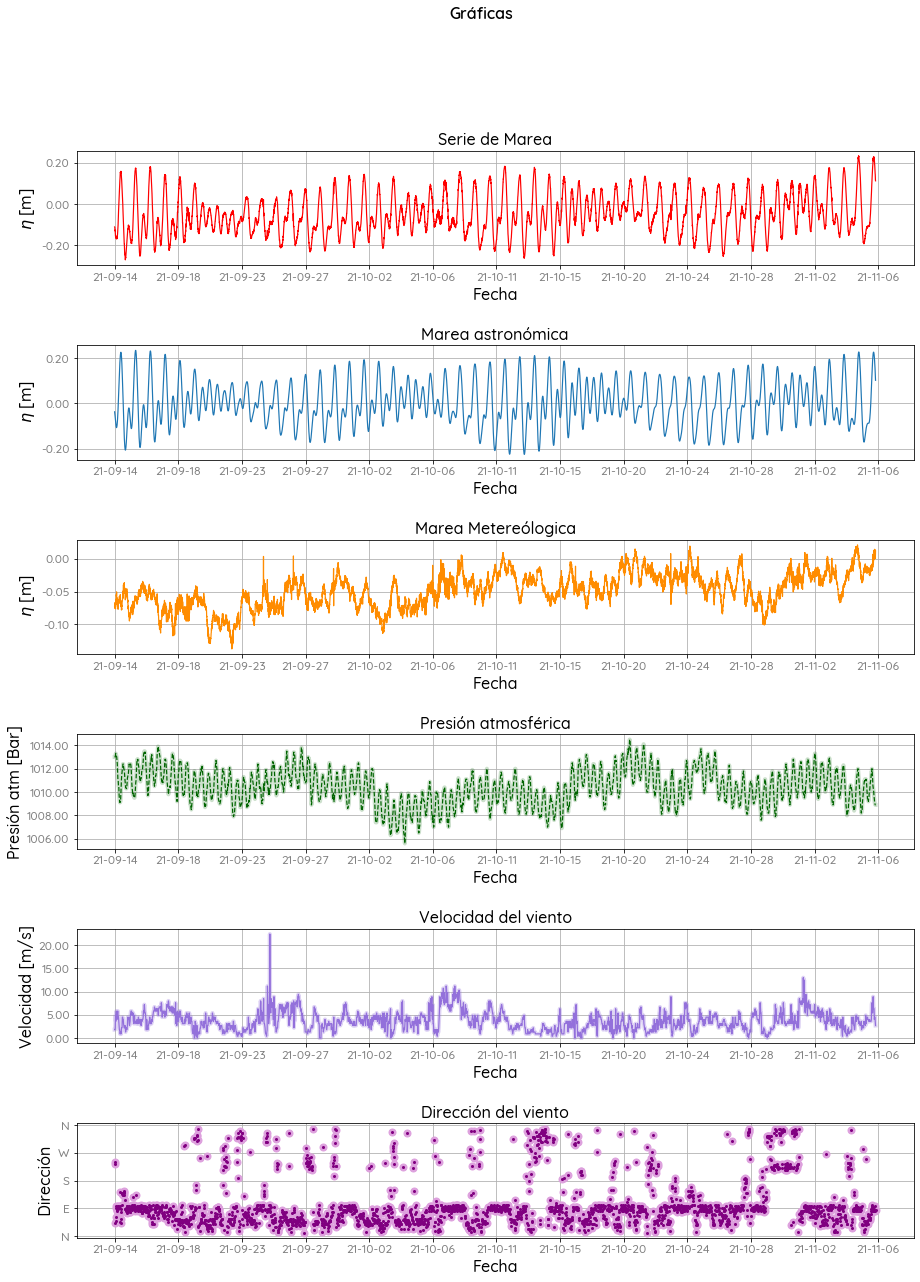

In [40]:
hourticks = ((t2[-1]-t2[0]).days*24 +(t2[-1]-t2[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([t2[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12
ytiks = np.arange(0,365,90)
ylabels = ['N','E','S','W','N']


fig, axs = plt.subplots(6,1,figsize=(15,20))
ax = axs[0]
ax.plot(df_tide.index.values, df_tide.Marea.values, color = 'r', lw = 1.2, ms=5)
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('$\eta$ [m]',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Serie de Marea',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

ax1 = axs[1]

ax1.plot(df_tide.index.values, df_tide.Astro.values, ms=5, lw = 1.2)
ax1.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax1.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax1.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax1.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_title('Marea astronómica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax1.grid(True)


ax2 = axs[2]

ax2.plot(df_tide.index.values, df_tide.Meteo.values, color = 'darkorange', lw = 1.2, ms=5)
ax2.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax2.set_ylabel (' $\eta$ [m]',size=16,fontproperties=prop1)
ax2.set_yticklabels(ax1.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax2.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_title('Marea Metereólogica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax2.grid(True)

plt.xticks(rotation=0)
ax1.grid(True)
plt.subplots_adjust(hspace=0.5)


ax3 = axs[3]

ax3.plot(t2,Patm, color = 'darkgreen', lw = 4, ms=5, alpha = 0.2)
ax3.plot(t2,Patm, color = 'darkgreen', lw = 1.2, ms=5, ls = '--')

ax3.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax3.xaxis.set_major_formatter(date_format)
ax3.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax3.set_ylabel ('Presión atm [Bar]',size=16,fontproperties=prop1)
ax3.set_yticklabels(ax3.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax3.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.set_title('Presión atmosférica',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax3.grid(True)


ax4 = axs[4]

ax4.plot(t2,Vwind, color = 'mediumpurple', lw = 4, ms=5, alpha= 0.3)
ax4.plot(t2,Vwind, color = 'mediumpurple', lw = 1.2, ms=5)

ax4.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d')
ax4.xaxis.set_major_formatter(date_format)
ax4.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax4.set_ylabel ('Velocidad [m/s]',size=16,fontproperties=prop1)
ax4.set_yticklabels(ax4.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax4.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax4.set_title('Velocidad del viento',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax4.grid(True)


ax5 = axs[5]

ax5.plot(t2,dir_degree, color = 'plum', lw = 1.2, ms=7, ls = ' ', marker = 'o')
ax5.plot(t2,dir_degree, color = 'purple', lw = 1.2, ms=2, ls = ' ', marker = 'o')

ax5.set_xticks(xticks_time)
ax5.set_yticks(ytiks)
# ax5.set_yticklabels(ylabels)
date_format = mdates.DateFormatter('%y-%m-%d')
ax5.xaxis.set_major_formatter(date_format)
ax5.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax5.set_ylabel (' Dirección ',size=16,fontproperties=prop1)
ax5.set_yticklabels(ylabels, fontproperties=prop1,color='gray',size = 12)
for label in ax5.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
# ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax5.set_title('Dirección del viento',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax5.grid(True)


plt.subplots_adjust(hspace=0.7)
# ax.set_title('Velocidad superficial',size=15)
# plt.savefig('E:/Escritorio/INFORME 1ER AÑO UNAL/Anexo_B1/velocidad_2D.png',dpi=800,bbox_inches='tight',pad_inches=0)